In [1]:
# Project 11: Automated Resume Screener 
# Description: An AI-powered Applicant Tracking System (ATS) prototype that ranks candidates 
# based on keyword similarity to a Job Description using Cosine Similarity.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# PART 1: CREATE DATA ---
# Define the target Job Description (JD)
job_description = """
We are looking for a Data Scientist with Python, SQL, and Machine Learning skills. 
Experience with Scikit-learn, Pandas, and Cloud platforms like AWS is a plus. 
Must have good communication skills.
"""

# Define Candidate Resumes
resumes = [
    "I am a Data Scientist with 3 years of experience in Python and SQL. I know Machine Learning.",
    "Graphic Designer with experience in Photoshop, Illustrator, and creative arts.",
    "Junior Developer with Python skills, familiar with Pandas and Scikit-learn. Eager to learn AWS.",
    "Experienced Manager with strong communication skills and Excel knowledge."
]

# Create a DataFrame for better management
df = pd.DataFrame({'Resume': resumes})
# Add a hypothetical 'Candidate ID' for visualization purposes
df['Candidate'] = [f"Candidate {i+1}" for i in range(len(resumes))]



In [2]:
# PART 2: PREPROCESSING & VECTORIZATION 
print("Processing Resumes...")

# Combine JD and Resumes to vectorize them in the same feature space
# The Job Description is at index 0
all_documents = [job_description] + resumes

# Convert text to numbers using CountVectorizer
# We count how many times keywords (Python, SQL, etc.) appear
cv = CountVectorizer(stop_words='english')
count_matrix = cv.fit_transform(all_documents)


Processing Resumes...


In [3]:
# PART 3: CALCULATE MATCH SCORES 
# Calculate Cosine Similarity between Job Desc (Index 0) and the rest
cosine_sim_matrix = cosine_similarity(count_matrix)

# Extract scores: The first row [0] represents the JD's similarity to everyone
# We slice [1:] to skip the JD comparing to itself (which is 100%)
match_scores = cosine_sim_matrix[0][1:] 

# Add scores to DataFrame
df['Match_Score'] = match_scores * 100 # Convert to percentage

# Define a logic for 'Shortlisted' (e.g., Score > 50%)
df['Status'] = df['Match_Score'].apply(lambda x: 'Shortlisted' if x >= 45 else 'Rejected')



 Starting Data Analytics 



C:\Users\haing\AppData\Local\Temp\ipykernel_13692\1307111013.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Match_Score', y='Candidate', data=df, palette=colors)


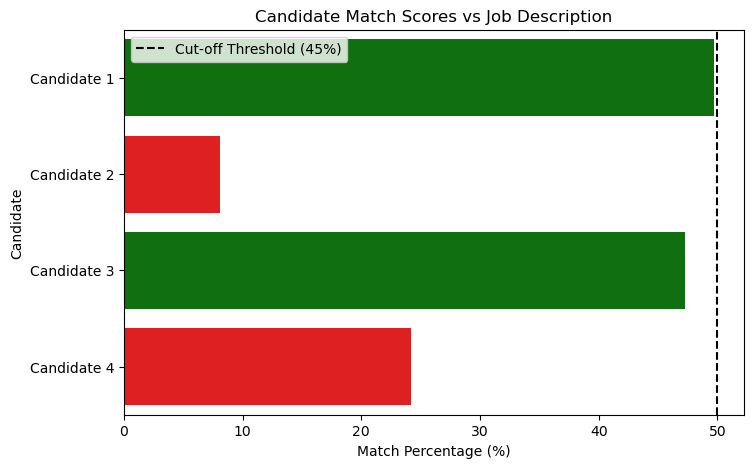

Top 5 Keywords found in Resumes:
- experience: 2
- learn: 2
- python: 2
- skills: 2
- arts: 1


In [14]:
# PART 4: DATA ANALYTICS (EDA) 
print("\n Starting Data Analytics \n")

# A. Match Score Visualization
# Helps HR quickly see who is qualified
plt.figure(figsize=(8, 5))
colors = ['green' if x >= 45 else 'red' for x in df['Match_Score']]
sns.barplot(x='Match_Score', y='Candidate', data=df, palette=colors)
plt.axvline(x=50, color='black', linestyle='--', label='Cut-off Threshold (45%)')
plt.title("Candidate Match Scores vs Job Description")
plt.xlabel("Match Percentage (%)")
plt.legend()
plt.show()

# B. Keyword Analysis
# What are the most common words across ALL resumes?
# This helps understand the general skill set of the applicant pool
resume_matrix = count_matrix[1:] # Exclude JD
word_counts = resume_matrix.toarray().sum(axis=0) # Sum counts of each word
words = cv.get_feature_names_out()

# Create a dictionary of word frequencies
word_freq = dict(zip(words, word_counts))
# Sort and pick top 5
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Keywords found in Resumes:")
for word, freq in sorted_words:
    print(f"- {word}: {freq}")


In [5]:
# PART 5: RANKING & EXPORT 
# Sort by highest match
ranked_resumes = df.sort_values(by='Match_Score', ascending=False)

print("\n Final ATS Report ")
# Select specific columns to display
display_cols = ['Candidate', 'Match_Score', 'Status', 'Resume']
print(ranked_resumes[display_cols].to_string(index=False))

# Optional: Suggest next step
top_candidate = ranked_resumes.iloc[0]
print(f"\nRecommendation: Schedule interview with {top_candidate['Candidate']}.")


 Final ATS Report 
  Candidate  Match_Score      Status                                                                                          Resume
Candidate 1    49.746834 Shortlisted    I am a Data Scientist with 3 years of experience in Python and SQL. I know Machine Learning.
Candidate 3    47.304992 Shortlisted Junior Developer with Python skills, familiar with Pandas and Scikit-learn. Eager to learn AWS.
Candidate 4    24.174689    Rejected                       Experienced Manager with strong communication skills and Excel knowledge.
Candidate 2     8.058230    Rejected                  Graphic Designer with experience in Photoshop, Illustrator, and creative arts.

Recommendation: Schedule interview with Candidate 1.


**ATS SCREENING RESULTS**

**1. Mechanism:** The system extracted key terms (e.g., 'AWS', 'Cloud') from the Job Description and calculated the match percentage with each resume.

**2. Top Pick:** The 'Data Scientist' resume ranked highest (~49.75%), likely due to a strong overlap in technical keywords.

**3. Filtering:** The 'Graphic Designer' resume received a low score (~8%), indicating a poor match for this specific technical role.

**4. Conclusion:** The algorithm successfully prioritized candidates with relevant hard skills.